# Titanic

## Load

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. 891개의 데이터와 12개의 열로 구성된 데이터.
2. Age, Cabin, Embarked 컬럼 Null값 존재
3. 객체 타입 데이터 5개

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA
 - Exploratory Data Ananlyis

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

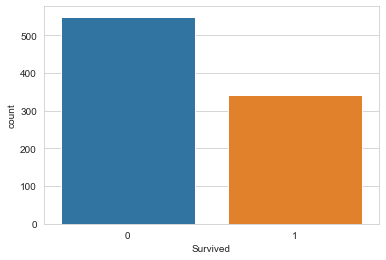

In [6]:
# See the distribution of the target
sns.countplot(x='Survived', data = df)
plt.show()

대부분의 승객이 사망했으므로 표적의 분포 균형이 맞지 않음 (사망한 승객이 생존한 승객의 약 2배)

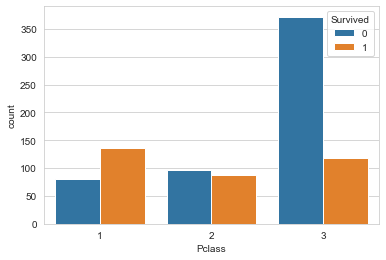

In [7]:
# See number of peoplr survived based on Pclass
sns.countplot(x='Pclass', data = df, hue = 'Survived')
plt.show()

1. 객실 3의 승객은 거의 사망
2. 객실 1의 승객은 대부분 생존

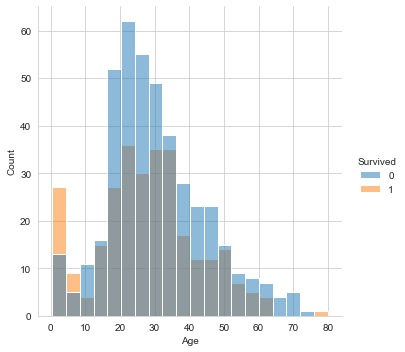

In [8]:
#See the distribution of Age
sns.displot(data = df, x='Age', hue='Survived')
plt.show()

- 10세 미만의 승객은 다른 승객에 비해 생존율이 높은편

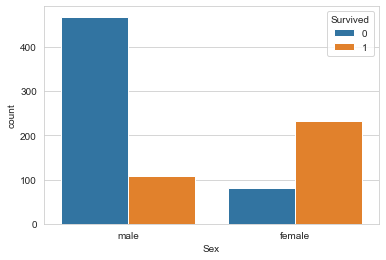

In [9]:
# See number of peoplr survived based on Sex
sns.countplot(x='Sex', data=df, hue='Survived')
plt.show()

- 대부분의 여성 승객 생존
- 대부분의 남성 승객 사망

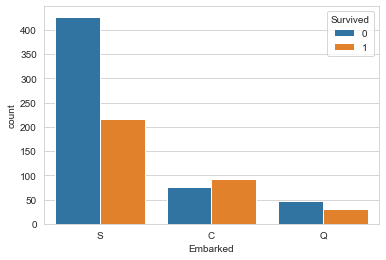

In [10]:
sns.countplot(x='Embarked', data=df, hue='Survived')
plt.show()

- C 선착장의 승객이 다른 곳에 비해 많이 생존

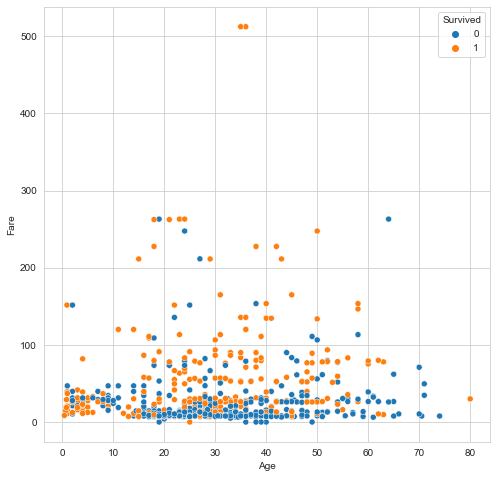

In [11]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived')
plt.show()

1. 요금을 더 많이 지불한 승객의 생존율 향상
2. 500불 이상 지불한 이상치 존재

## Feature Engineering

In [12]:
# Exclude passengers who paid fare more than 500
df = df[df['Fare']<500]

In [13]:
# Count value in cabin columns
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
E101           3
              ..
C32            1
E46            1
E77            1
B51 B53 B55    1
B80            1
Name: Cabin, Length: 146, dtype: int64

- Cabin 컬럼에 변수가 많으므로 삭제

In [14]:
del df['Cabin']

In [15]:
# Fill null values in Embarked columns
df['Embarked'].fillna('S', inplace=True)

In [16]:
# Check the corrleation with age column
df.corr()['Age']

PassengerId    0.036181
Survived      -0.079472
Pclass        -0.368625
Age            1.000000
SibSp         -0.307639
Parch         -0.189194
Fare           0.100396
Name: Age, dtype: float64